In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

### Load train data

In [3]:
train_path = '../../feature_extracted_data/training_features_01.csv'
train_data = pd.read_csv(train_path)
train_data.shape

(51700, 560)

In [5]:
print(train_data.head())

   AN311_window_1_mean  AN311_window_1_std  AN311_window_1_min  \
0             3.392500            0.139142                 3.2   
1             3.372500            0.099132                 3.2   
2             3.356667            0.121610                 3.2   
3             3.380833            0.130573                 3.2   
4             3.355000            0.125731                 3.1   

   AN311_window_1_max  AN311_window_2_mean  AN311_window_2_std  \
0                 3.7             3.356667            0.121610   
1                 3.7             3.380833            0.130573   
2                 3.6             3.355000            0.125731   
3                 3.6             3.392500            0.152295   
4                 3.5             3.402500            0.145179   

   AN311_window_2_min  AN311_window_2_max  AN311_window_3_mean  \
0                 3.2                 3.6             3.355000   
1                 3.2                 3.6             3.392500   
2       

In [7]:
train_label_path = '../../extracted_data/train_labels_full_with_columns.csv'
train_labels = pd.read_csv(train_label_path)
train_labels.shape

(51700, 3)

In [9]:
train_labels.head()

,MM263,MM264,MM256
0,normal,normal,normal
1,normal,normal,normal
2,normal,normal,normal
3,normal,normal,normal
4,normal,normal,normal


### Load Test data

In [11]:
test_data = pd.read_csv("../../feature_extracted_data/test_features_01.csv")
test_data.shape

(5076, 560)

In [13]:
test_data.head()

,AN311_window_1_mean,AN311_window_1_std,AN311_window_1_min,AN311_window_1_max,AN311_window_2_mean,AN311_window_2_std,AN311_window_2_min,AN311_window_2_max,AN311_window_3_mean,AN311_window_3_std,...,V_window_3_min,V_window_3_max,V_window_4_mean,V_window_4_std,V_window_4_min,V_window_4_max,V_window_5_mean,V_window_5_std,V_window_5_min,V_window_5_max
0,4.073333,0.124989,3.9,4.4,4.061667,0.105026,3.9,4.2,4.158333,0.104549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.345833,0.246271,2.9,3.9,3.205000,0.133448,2.8,3.7,3.274167,0.198954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.148333,0.100816,3.9,4.3,4.056667,0.098939,3.9,4.2,4.100000,0.125167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.177500,0.350823,2.7,4.0,3.215833,0.316490,2.7,3.9,3.261667,0.192000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.918333,0.172715,3.6,4.2,3.790000,0.159896,3.6,4.2,3.873333,0.185173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
test_labels = pd.read_csv("../../extracted_data/test_labels_full_with_columns.csv")
print(test_labels.shape)
print(test_labels.head())

(5076, 3)
    MM263   MM264    MM256
0  normal  normal  warning
1  normal  normal   normal
2  normal  normal   normal
3  normal  normal   normal
4  normal  normal   normal


In [17]:
# Separate features and target
X_train = train_data
y_train = train_labels['MM263']

X_test = test_data
y_test = test_labels['MM263']

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(51700, 560)
(51700,)
(5076, 560)
(5076,)


In [19]:
counts = train_labels['MM263'].value_counts()  # This gives you a count of each unique value in the column

# Calculate the probability of 'warning'
if 'warning' in counts:
    warning_probability = counts['warning'] / counts.sum()
else:
    warning_probability = 0  # In case there are no 'warning' labels

print("Probability of 'warning':", warning_probability)


Probability of 'warning': 0.008994197292069633


In [29]:
def trainRF(nestimators,depth ):
    rf_classifier = RandomForestClassifier(
        n_estimators=nestimators,
        max_depth=depth,
        # min_samples_split=50,
        # min_samples_leaf=20,
        # max_features='sqrt',
        random_state=42,
        class_weight='balanced'
    )
    rf_classifier.fit(X_train, y_train)
    rf_probabilities = rf_classifier.predict_proba(X_test)
    auc = roc_auc_score(y_test, rf_probabilities[:, 1])
    print("AUC with combined settings:", auc)

    # Threshold derived from training data's class distribution
    warning_threshold = warning_probability  # The variable computed earlier
    
    # Assuming the 'warning' class is the second column in the probabilities
    predicted_labels = np.where(rf_probabilities[:, 1] >= warning_threshold, 'warning', 'normal')
    
    print(classification_report(y_test, predicted_labels))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))
    # return rf_probabilities


In [31]:
trainRF(100, 100)

AUC with combined settings: 0.7436824789415966
              precision    recall  f1-score   support

      normal       1.00      0.50      0.67      5042
     warning       0.01      0.85      0.02        34

    accuracy                           0.50      5076
   macro avg       0.50      0.68      0.34      5076
weighted avg       0.99      0.50      0.66      5076

Confusion Matrix:
 [[2517 2525]
 [   5   29]]


In [33]:
trainRF(500, 100)

AUC with combined settings: 0.7332261940873136
              precision    recall  f1-score   support

      normal       1.00      0.63      0.77      5042
     warning       0.01      0.76      0.03        34

    accuracy                           0.63      5076
   macro avg       0.51      0.70      0.40      5076
weighted avg       0.99      0.63      0.77      5076

Confusion Matrix:
 [[3163 1879]
 [   8   26]]


In [35]:
trainRF(1000, 1000)

AUC with combined settings: 0.7924901416338054
              precision    recall  f1-score   support

      normal       1.00      0.57      0.73      5042
     warning       0.01      0.88      0.03        34

    accuracy                           0.57      5076
   macro avg       0.51      0.73      0.38      5076
weighted avg       0.99      0.57      0.72      5076

Confusion Matrix:
 [[2887 2155]
 [   4   30]]


In [39]:
trainRF(500, 1000)

AUC with combined settings: 0.7332261940873136
              precision    recall  f1-score   support

      normal       1.00      0.63      0.77      5042
     warning       0.01      0.76      0.03        34

    accuracy                           0.63      5076
   macro avg       0.51      0.70      0.40      5076
weighted avg       0.99      0.63      0.77      5076

Confusion Matrix:
 [[3163 1879]
 [   8   26]]


In [37]:
trainRF(2000, 2000)

AUC with combined settings: 0.7644287980959936
              precision    recall  f1-score   support

      normal       1.00      0.50      0.67      5042
     warning       0.01      0.88      0.02        34

    accuracy                           0.50      5076
   macro avg       0.51      0.69      0.35      5076
weighted avg       0.99      0.50      0.66      5076

Confusion Matrix:
 [[2526 2516]
 [   4   30]]


### Combining original data with window features.

In [21]:
original_train_data = pd.read_csv("../../extracted_data/training_data_full_with_columns.csv")
original_train_data.shape

(51700, 16800)

In [22]:
original_test_data = pd.read_csv("../../extracted_data/test_data_full_with_columns.csv")
original_test_data.shape

(5076, 16800)

In [23]:
merged_train_df = pd.concat([original_train_data, train_data], axis=1)
merged_train_df.shape

(51700, 17360)

In [24]:
merged_test_df = pd.concat([original_test_data, test_data], axis=1)
merged_test_df.shape

(5076, 17360)

In [25]:
# Separate features and target
X_train = merged_train_df
y_train = train_labels['MM263']

X_test = merged_test_df
y_test = test_labels['MM263']

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(51700, 17360)
(51700,)
(5076, 17360)
(5076,)


In [60]:
def trainRF(nestimators, depth ):
    rf_classifier = RandomForestClassifier(
        n_estimators=nestimators,
        max_depth=depth,
        # min_samples_split=50,
        # min_samples_leaf=20,
        # max_features='sqrt',
        random_state=42,
        class_weight='balanced'
    )
    rf_classifier.fit(X_train, y_train)
    rf_probabilities = rf_classifier.predict_proba(X_test)
    auc = roc_auc_score(y_test, rf_probabilities[:, 1])
    print("AUC with combined settings:", auc)

    # Threshold derived from training data's class distribution
    warning_threshold = warning_probability  # The variable computed earlier
    
    # Assuming the 'warning' class is the second column in the probabilities
    predicted_labels = np.where(rf_probabilities[:, 1] >= warning_threshold, 'warning', 'normal')
    
    print(classification_report(y_test, predicted_labels))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))
    # return rf_probabilities

In [56]:
trainRF(100)

AUC with combined settings: 0.7491891639638799
              precision    recall  f1-score   support

      normal       1.00      0.67      0.80      5042
     warning       0.02      0.76      0.03        34

    accuracy                           0.67      5076
   macro avg       0.51      0.72      0.42      5076
weighted avg       0.99      0.67      0.80      5076

Confusion Matrix:
 [[3399 1643]
 [   8   26]]


In [58]:
trainRF(200)

AUC with combined settings: 0.7041498471661571
              precision    recall  f1-score   support

      normal       1.00      0.67      0.80      5042
     warning       0.01      0.65      0.03        34

    accuracy                           0.67      5076
   macro avg       0.50      0.66      0.41      5076
weighted avg       0.99      0.67      0.80      5076

Confusion Matrix:
 [[3391 1651]
 [  12   22]]


In [62]:
trainRF(200, 500)

AUC with combined settings: 0.7041498471661571
              precision    recall  f1-score   support

      normal       1.00      0.67      0.80      5042
     warning       0.01      0.65      0.03        34

    accuracy                           0.67      5076
   macro avg       0.50      0.66      0.41      5076
weighted avg       0.99      0.67      0.80      5076

Confusion Matrix:
 [[3391 1651]
 [  12   22]]


In [64]:
trainRF(1000, 1000)

AUC with combined settings: 0.746925823086077
              precision    recall  f1-score   support

      normal       1.00      0.75      0.86      5042
     warning       0.02      0.74      0.04        34

    accuracy                           0.75      5076
   macro avg       0.51      0.74      0.45      5076
weighted avg       0.99      0.75      0.85      5076

Confusion Matrix:
 [[3776 1266]
 [   9   25]]


In [49]:
def trainRF(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        class_weight='balanced'
    )
    rf_classifier.fit(X_train, y_train)
    return rf_classifier


In [65]:
rf_classifier = trainRF(n_estimators=700, max_depth=200, min_samples_split=100, min_samples_leaf=50, max_features='sqrt')

In [73]:
rf_probabilities = rf_classifier.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, rf_probabilities)
print(f"AUC with settings: {auc}")


# Probabilities for 'warning' class
thresholds = [0.01, 0.05,0.08, 0.1, 0.2, 0.3, 0.4, 0.5]

print("Evaluating different thresholds:")

# Store results for comparison
results = []

for threshold in thresholds:
    # Apply threshold
    predicted_labels = np.where(rf_probabilities >= threshold, 'warning', 'normal')
    
    # Compute ROC AUC for this threshold
    auc = roc_auc_score(y_test, rf_probabilities)  # AUC remains the same as it's threshold-independent
    
    # Generate classification report and confusion matrix
    report = classification_report(y_test, predicted_labels, output_dict=True)
    matrix = confusion_matrix(y_test, predicted_labels)
    
    # Print results
    print(f"\nThreshold: {threshold}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_labels))
    print("Confusion Matrix:")
    print(matrix)
    
    # Save results
    results.append({
        'threshold': threshold,
        'report': report,
        'matrix': matrix,
        'auc': auc
    })


AUC with settings: 0.8666962223207411
Evaluating different thresholds:

Threshold: 0.01
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.15      0.26      5042
     warning       0.01      0.94      0.01        34

    accuracy                           0.15      5076
   macro avg       0.50      0.54      0.14      5076
weighted avg       0.99      0.15      0.26      5076

Confusion Matrix:
[[ 750 4292]
 [   2   32]]

Threshold: 0.05
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.65      0.79      5042
     warning       0.02      0.85      0.03        34

    accuracy                           0.65      5076
   macro avg       0.51      0.75      0.41      5076
weighted avg       0.99      0.65      0.78      5076

Confusion Matrix:
[[3271 1771]
 [   5   29]]

Threshold: 0.08
Classification Report:
              precision    recall  f1-score   support

      norm

In [66]:
rf_classifier_2 = trainRF(n_estimators=600, max_depth=300, min_samples_split=200, min_samples_leaf=150, max_features='sqrt')

In [77]:
rf_probabilities_2 = rf_classifier_2.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, rf_probabilities_2)
print(f"AUC with settings: {auc}")

# Probabilities for 'warning' class
thresholds = [0.0001, 0.01, 0.05,0.08, 0.1, 0.2, 0.3, 0.4, 0.5]

print("Evaluating different thresholds:")

# Store results for comparison
results = []

for threshold in thresholds:
    # Apply threshold
    predicted_labels = np.where(rf_probabilities_2 >= threshold, 'warning', 'normal')
    
    # Compute ROC AUC for this threshold
    auc = roc_auc_score(y_test, rf_probabilities_2)  # AUC remains the same as it's threshold-independent
    
    # Generate classification report and confusion matrix
    report = classification_report(y_test, predicted_labels, output_dict=True)
    matrix = confusion_matrix(y_test, predicted_labels)
    
    # Print results
    print(f"\nThreshold: {threshold}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_labels))
    print("Confusion Matrix:")
    print(matrix)
    
    # Save results
    results.append({
        'threshold': threshold,
        'report': report,
        'matrix': matrix,
        'auc': auc
    })


AUC with settings: 0.8841379471264903
Evaluating different thresholds:

Threshold: 0.0001
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.00      0.00      5042
     warning       0.01      1.00      0.01        34

    accuracy                           0.01      5076
   macro avg       0.50      0.50      0.01      5076
weighted avg       0.99      0.01      0.00      5076

Confusion Matrix:
[[  11 5031]
 [   0   34]]

Threshold: 0.01
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.13      0.24      5042
     warning       0.01      0.97      0.01        34

    accuracy                           0.14      5076
   macro avg       0.50      0.55      0.13      5076
weighted avg       0.99      0.14      0.24      5076

Confusion Matrix:
[[ 678 4364]
 [   1   33]]

Threshold: 0.05
Classification Report:
              precision    recall  f1-score   support

      no

In [79]:
rf_classifier_3 = trainRF(n_estimators=700, max_depth=400, min_samples_split=20, min_samples_leaf=20, max_features='sqrt')

In [85]:
rf_probabilities_3 = rf_classifier_3.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, rf_probabilities_3)
print(f"AUC with settings: {auc}")

# Probabilities for 'warning' class
thresholds = [0.0001, 0.01, 0.05,0.08, 0.1, 0.2, 0.3, 0.4, 0.5]

print("Evaluating different thresholds:")

# Store results for comparison
results = []

for threshold in thresholds:
    # Apply threshold
    predicted_labels = np.where(rf_probabilities_3 >= threshold, 'warning', 'normal')
    
    # Compute ROC AUC for this threshold
    auc = roc_auc_score(y_test, rf_probabilities_3)  # AUC remains the same as it's threshold-independent
    
    # Generate classification report and confusion matrix
    report = classification_report(y_test, predicted_labels, output_dict=True)
    matrix = confusion_matrix(y_test, predicted_labels)
    
    # Print results
    print(f"\nThreshold: {threshold}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_labels))
    print("Confusion Matrix:")
    print(matrix)
    
    # Save results
    results.append({
        'threshold': threshold,
        'report': report,
        'matrix': matrix,
        'auc': auc
    })


AUC with settings: 0.8424878082926943
Evaluating different thresholds:

Threshold: 0.0001
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.01      0.02      5042
     warning       0.01      1.00      0.01        34

    accuracy                           0.02      5076
   macro avg       0.50      0.50      0.02      5076
weighted avg       0.99      0.02      0.02      5076

Confusion Matrix:
[[  44 4998]
 [   0   34]]

Threshold: 0.01
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.25      0.40      5042
     warning       0.01      0.94      0.02        34

    accuracy                           0.25      5076
   macro avg       0.50      0.60      0.21      5076
weighted avg       0.99      0.25      0.40      5076

Confusion Matrix:
[[1261 3781]
 [   2   32]]

Threshold: 0.05
Classification Report:
              precision    recall  f1-score   support

      no

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa


Threshold: 0.4
Classification Report:
              precision    recall  f1-score   support

      normal       0.99      1.00      1.00      5042
     warning       0.00      0.00      0.00        34

    accuracy                           0.99      5076
   macro avg       0.50      0.50      0.50      5076
weighted avg       0.99      0.99      0.99      5076

Confusion Matrix:
[[5042    0]
 [  34    0]]

Threshold: 0.5
Classification Report:
              precision    recall  f1-score   support

      normal       0.99      1.00      1.00      5042
     warning       0.00      0.00      0.00        34

    accuracy                           0.99      5076
   macro avg       0.50      0.50      0.50      5076
weighted avg       0.99      0.99      0.99      5076

Confusion Matrix:
[[5042    0]
 [  34    0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Feature Importance

In [104]:
import pandas as pd

# Extract feature importances from the model
importances = rf_classifier_2.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]

# Pair feature names with their importances
feature_importances = [(merged_train_df.columns[i], importances[i]) for i in indices]

# Convert list of tuples to a DataFrame for better visualization and manipulation
feature_importances_df = pd.DataFrame(feature_importances, columns=['Feature', 'Importance'])

# Print the DataFrame
print(feature_importances_df)

# Optionally, save the DataFrame to a CSV file for easier analysis and sharing
feature_importances_df.to_csv('RF_Feature_Importances.csv', index=False)


                   Feature  Importance
0      MM263_window_5_mean    0.011531
1       MM263_window_5_max    0.008834
2          MM263_value_570    0.008778
3          MM263_value_599    0.008775
4          MM263_value_410    0.008534
...                    ...         ...
17355      MM262_value_212    0.000000
17356      MM262_value_211    0.000000
17357      MM262_value_210    0.000000
17358      MM262_value_209    0.000000
17359        AN311_value_1    0.000000

[17360 rows x 2 columns]


     Sensor                                            Feature  Importance
18    MM263  MM263_value_1MM263_value_2MM263_value_3MM263_v...    0.746354
20    P_864  P_864_value_1P_864_value_2P_864_value_3P_864_v...    0.044714
5     AN423  AN423_value_1AN423_value_2AN423_value_3AN423_v...    0.035867
21   RH1712  RH1712_value_1RH1712_value_2RH1712_value_3RH17...    0.030729
8     CM861  CM861_value_1CM861_value_2CM861_value_3CM861_v...    0.019334
15    MM256  MM256_value_1MM256_value_2MM256_value_3MM256_v...    0.017830
9     CR863  CR863_value_1CR863_value_2CR863_value_3CR863_v...    0.016758
19    MM264  MM264_value_1MM264_value_2MM264_value_3MM264_v...    0.012576
6    BA1713  BA1713_value_1BA1713_value_2BA1713_value_3BA17...    0.011095
24   TP1711  TP1711_value_1TP1711_value_2TP1711_value_3TP17...    0.010328
22   RH1722  RH1722_value_1RH1722_value_2RH1722_value_3RH17...    0.009211
4     AN422  AN422_value_1AN422_value_2AN422_value_3AN422_v...    0.008700
7    BA1723  BA1723_value

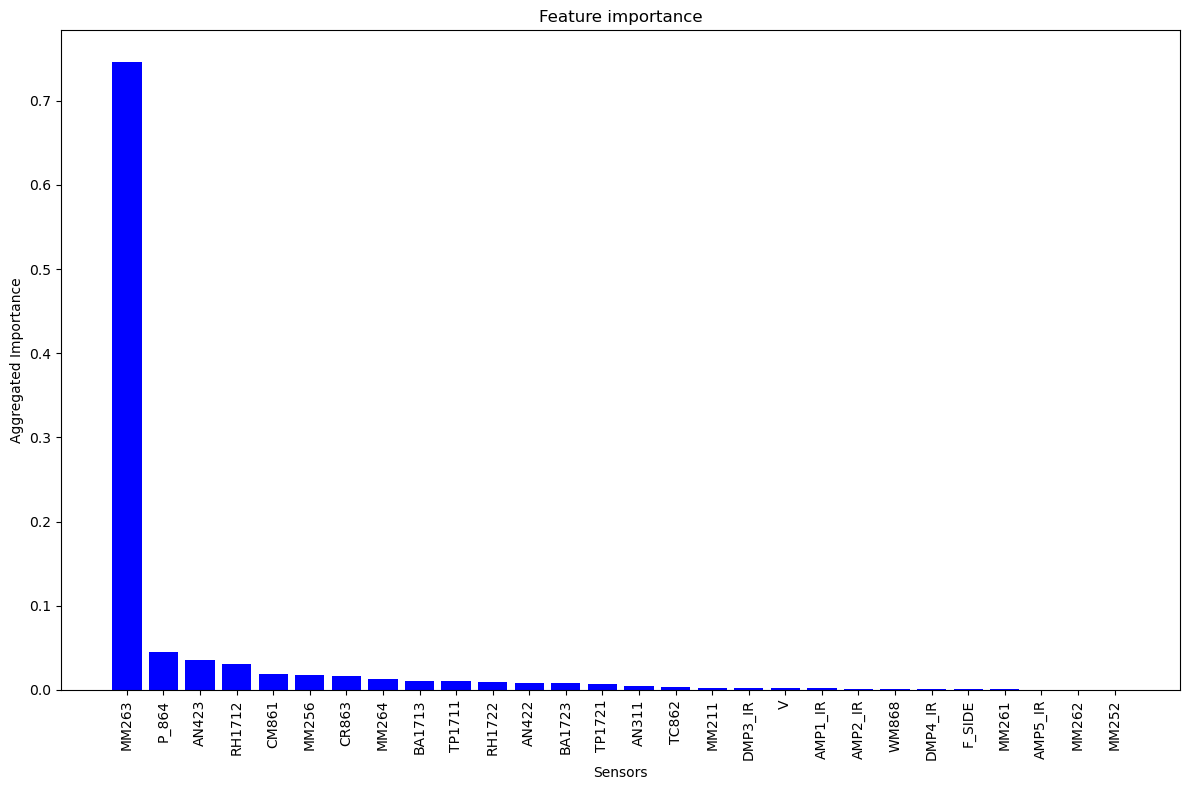

In [139]:
import pandas as pd
import numpy as np

# Extract feature importances from the model
importances = rf_classifier_2.feature_importances_
feature_names = merged_train_df.columns

# Create a DataFrame from features and their importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Define the sensor names
sensors = [
    "AN311", "AN422", "AN423", "TP1721", "RH1722", "BA1723", "TP1711", "RH1712", "BA1713",
    "MM252", "MM261", "MM262", "MM263", "MM264", "MM256", "MM211", "CM861", "CR863", "P_864",
    "TC862", "WM868", "AMP1_IR", "AMP2_IR", "DMP3_IR", "DMP4_IR", "AMP5_IR", "F_SIDE", "V"
]

# Function to extract the base sensor name
def extract_sensor_name(feature_name):
    for sensor in sensors:
        if feature_name.startswith(sensor):
            return sensor
    return "Unknown Sensor"

# Apply the function to get sensor names
importance_df['Sensor'] = importance_df['Feature'].apply(extract_sensor_name)

# Group by Sensor and sum the importances
sensor_importances = importance_df.groupby('Sensor').sum().reset_index()

# Sort the sensors by their importance
sorted_sensor_importances = sensor_importances.sort_values(by='Importance', ascending=False)

# Print the sorted sensor importances
print(sorted_sensor_importances)

# Optionally, plot the sensor importances
plt.figure(figsize=(12, 8))
plt.bar(sorted_sensor_importances['Sensor'], sorted_sensor_importances['Importance'], color='b')
plt.xlabel('Sensors')
plt.ylabel('Aggregated Importance')
plt.title('Feature importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances from the model
importances = rf_classifier_2.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]

# Number of features to display
n_features = 1000  # You can change this number to 100 or whatever suits your needs

# Prepare labels for the x-axis (make sure you have the feature names)
feature_labels = merged_train_df.columns[indices][:n_features]
print(feature_labels)

Index(['MM263_window_5_mean', 'MM263_window_5_max', 'MM263_value_570',
       'MM263_value_599', 'MM263_value_410', 'MM263_window_4_max',
       'MM263_value_563', 'MM263_value_490', 'MM263_value_551',
       'MM263_value_545',
       ...
       'RH1712_value_252', 'CM861_value_66', 'RH1712_value_179',
       'CR863_value_546', 'P_864_value_113', 'CM861_value_577',
       'MM264_value_26', 'MM264_window_1_mean', 'RH1712_value_56',
       'CR863_value_53'],
      dtype='object', length=1000)


### with default settings 

In [88]:
def trainRF(n_estimators):
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        random_state=42,
        class_weight='balanced'
    )
    rf_classifier.fit(X_train, y_train)
    return rf_classifier


In [90]:
rf_classifier_1 = trainRF(n_estimators=300)

In [97]:
# Probabilities for 'warning' class
thresholds = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

rf_probabilities = rf_classifier_1.predict_proba(X_test)[:, 1]
# Compute ROC AUC for this threshold
auc = roc_auc_score(y_test, rf_probabilities)  # AUC remains the same as it's threshold-independent
print("AUC = ", auc)    

print("Evaluating different thresholds:")

# Store results for comparison
results = []

for threshold in thresholds:
    # Apply threshold
    predicted_labels = np.where(rf_probabilities >= threshold, 'warning', 'normal')
    
    # Generate classification report and confusion matrix
    report = classification_report(y_test, predicted_labels, output_dict=True)
    matrix = confusion_matrix(y_test, predicted_labels)
    
    # Print results
    print(f"\nThreshold: {threshold}")
    print("Classification Report:")
    print(classification_report(y_test, predicted_labels))
    print("Confusion Matrix:")
    print(matrix)
    
    # Save results
    results.append({
        'threshold': threshold,
        'report': report,
        'matrix': matrix,
        'auc': auc
    })


AUC =  0.7486320787735959
Evaluating different thresholds:

Threshold: 0.001
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.39      0.56      5042
     warning       0.01      0.88      0.02        34

    accuracy                           0.40      5076
   macro avg       0.50      0.64      0.29      5076
weighted avg       0.99      0.40      0.56      5076

Confusion Matrix:
[[1981 3061]
 [   4   30]]

Threshold: 0.01
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.73      0.84      5042
     warning       0.02      0.79      0.04        34

    accuracy                           0.73      5076
   macro avg       0.51      0.76      0.44      5076
weighted avg       0.99      0.73      0.84      5076

Confusion Matrix:
[[3673 1369]
 [   7   27]]

Threshold: 0.05
Classification Report:
              precision    recall  f1-score   support

      normal       0.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

              precision    recall  f1-score   support

      normal       0.99      1.00      1.00      5042
     warning       0.00      0.00      0.00        34

    accuracy                           0.99      5076
   macro avg       0.50      0.50      0.50      5076
weighted avg       0.99      0.99      0.99      5076

Confusion Matrix:
[[5042    0]
 [  34    0]]

Threshold: 0.4
Classification Report:
              precision    recall  f1-score   support

      normal       0.99      1.00      1.00      5042
     warning       0.00      0.00      0.00        34

    accuracy                           0.99      5076
   macro avg       0.50      0.50      0.50      5076
weighted avg       0.99      0.99      0.99      5076

Confusion Matrix:
[[5042    0]
 [  34    0]]

Threshold: 0.5
Classification Report:
              precision    recall  f1-score   support

      normal       0.99      1.00      1.00      5042
     warning       0.00      0.00      0.00        34

    accuracy  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

### Baseline model

In [33]:
def trainRF(X, y, n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        class_weight='balanced'
    )
    rf_classifier.fit(X, y)
    
    return rf_classifier


In [35]:
rf_classifier_baseline = trainRF(X_train, y_train, n_estimators=600, max_depth=300, min_samples_split=100, min_samples_leaf=100, max_features='sqrt')

rf_probabilities = rf_classifier_baseline.predict_proba(X_test)
auc = roc_auc_score(y_test, rf_probabilities[:, 1])
print("AUC = ", auc)    
predicted_labels = np.where(rf_probabilities[:, 1] >= 0.5, 'warning', 'normal')

print(classification_report(y_test, predicted_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))

AUC =  0.8834146113820379
              precision    recall  f1-score   support

      normal       0.99      0.99      0.99      5042
     warning       0.08      0.18      0.11        34

    accuracy                           0.98      5076
   macro avg       0.54      0.58      0.55      5076
weighted avg       0.99      0.98      0.98      5076

Confusion Matrix:
 [[4975   67]
 [  28    6]]


In [41]:
rf_probabilities = rf_classifier_baseline.predict_proba(X_test)
auc = roc_auc_score(y_test, rf_probabilities[:, 1])
print("AUC = ", auc)    
predicted_labels = np.where(rf_probabilities[:, 1] >= 0.4, 'warning', 'normal')

# Calculate the confusion matrix and normalize it
cm = confusion_matrix(y_test, predicted_labels)
cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100  # Normalizing the confusion matrix to get percentages

print(classification_report(y_test, predicted_labels))
print("Confusion Matrix:\n", cm)
print("Confusion Matrix (%):\n", np.round(cm_percentage, 2))  # Printing the percentage matrix rounded to 2 decimal places

AUC =  0.8834146113820379
              precision    recall  f1-score   support

      normal       1.00      0.98      0.99      5042
     warning       0.11      0.44      0.18        34

    accuracy                           0.97      5076
   macro avg       0.55      0.71      0.58      5076
weighted avg       0.99      0.97      0.98      5076

Confusion Matrix:
 [[4923  119]
 [  19   15]]
Confusion Matrix (%):
 [[97.64  2.36]
 [55.88 44.12]]


In [45]:
rf_probabilities = rf_classifier_baseline.predict_proba(X_test)
auc = roc_auc_score(y_test, rf_probabilities[:, 1])
print("AUC = ", auc)    
predicted_labels = np.where(rf_probabilities[:, 1] >= 0.3, 'warning', 'normal')

# Calculate the confusion matrix and normalize it
cm = confusion_matrix(y_test, predicted_labels)
cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100  # Normalizing the confusion matrix to get percentages

print(classification_report(y_test, predicted_labels))
print("Confusion Matrix:\n", cm)
print("Confusion Matrix (%):\n", np.round(cm_percentage, 2))  # Printing the percentage matrix rounded to 2 decimal places

AUC =  0.8834146113820379
              precision    recall  f1-score   support

      normal       1.00      0.95      0.97      5042
     warning       0.09      0.71      0.16        34

    accuracy                           0.95      5076
   macro avg       0.54      0.83      0.57      5076
weighted avg       0.99      0.95      0.97      5076

Confusion Matrix:
 [[4796  246]
 [  10   24]]
Confusion Matrix (%):
 [[95.12  4.88]
 [29.41 70.59]]


In [39]:
rf_probabilities_baseline = rf_classifier_baseline.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, rf_probabilities_baseline)
print(f"AUC with settings: {auc}")

# Probabilities for 'warning' class
thresholds = [0.0001, 0.01, 0.05,0.08, 0.1, 0.2, 0.3, 0.4, 0.5]

print("Evaluating different thresholds:")

# Store results for comparison
results = []

for threshold in thresholds:
    # Apply threshold
    predicted_labels = np.where(rf_probabilities_baseline >= threshold, 'warning', 'normal')
    
    # Compute ROC AUC for this threshold
    auc = roc_auc_score(y_test, rf_probabilities_baseline)  # AUC remains the same as it's threshold-independent
    
    # Generate classification report and confusion matrix
    report = classification_report(y_test, predicted_labels)
    matrix = confusion_matrix(y_test, predicted_labels)
    
    # Print results
    print(f"\nThreshold: {threshold}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(matrix)
    


AUC with settings: 0.8834146113820379
Evaluating different thresholds:

Threshold: 0.0001
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.00      0.00      5042
     warning       0.01      1.00      0.01        34

    accuracy                           0.01      5076
   macro avg       0.50      0.50      0.01      5076
weighted avg       0.99      0.01      0.00      5076

Confusion Matrix:
[[   8 5034]
 [   0   34]]

Threshold: 0.01
Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.12      0.22      5042
     warning       0.01      0.97      0.01        34

    accuracy                           0.13      5076
   macro avg       0.50      0.55      0.12      5076
weighted avg       0.99      0.13      0.22      5076

Confusion Matrix:
[[ 615 4427]
 [   1   33]]

Threshold: 0.05
Classification Report:
              precision    recall  f1-score   support

      no

In [49]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

def trainRF(X_train, y_train, params):
    rf = RandomForestClassifier(**params, random_state=42, class_weight='balanced')
    rf.fit(X_train, y_train)
    return rf

# Parameters for the RandomForestClassifier
params = {
    'n_estimators': 100,
    'max_depth': 20,
    'min_samples_split': 50,
    'min_samples_leaf': 10,
    'max_features': 'sqrt'
}

# Setup TimeSeriesSplit for the training data
tscv = TimeSeriesSplit(n_splits=5)

# Perform the cross-validation on training data
best_auc = 0
best_model = None

for train_index, val_index in tscv.split(X_train):  
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Train the model on the training fold
    model = trainRF(X_train_fold, y_train_fold, params)
    
    # Predict on the validation fold
    rf_probabilities = model.predict_proba(X_val_fold)
    auc = roc_auc_score(y_val_fold, rf_probabilities[:, 1])
    
    # Keep track of the best performing model
    if auc > best_auc:
        best_auc = auc
        best_model = model

    print("Validation AUC = ", auc)

# Final evaluation on the test set
rf_probabilities = best_model.predict_proba(X_test)
predicted_labels = np.where(rf_probabilities[:, 1] >= 0.5, 'warning', 'normal')

# Metrics
auc = roc_auc_score(y_test, rf_probabilities[:, 1])
print("Test AUC = ", auc)
print(classification_report(y_test, predicted_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))


IndexError: index 1 is out of bounds for axis 1 with size 1

### Model without cutter loader features

In [118]:
X_train.columns

Index(['AN311_value_1', 'AN311_value_2', 'AN311_value_3', 'AN311_value_4',
       'AN311_value_5', 'AN311_value_6', 'AN311_value_7', 'AN311_value_8',
       'AN311_value_9', 'AN311_value_10',
       ...
       'V_window_3_min', 'V_window_3_max', 'V_window_4_mean', 'V_window_4_std',
       'V_window_4_min', 'V_window_4_max', 'V_window_5_mean', 'V_window_5_std',
       'V_window_5_min', 'V_window_5_max'],
      dtype='object', length=17360)

In [120]:
X_test.columns

Index(['AN311_value_1', 'AN311_value_2', 'AN311_value_3', 'AN311_value_4',
       'AN311_value_5', 'AN311_value_6', 'AN311_value_7', 'AN311_value_8',
       'AN311_value_9', 'AN311_value_10',
       ...
       'V_window_3_min', 'V_window_3_max', 'V_window_4_mean', 'V_window_4_std',
       'V_window_4_min', 'V_window_4_max', 'V_window_5_mean', 'V_window_5_std',
       'V_window_5_min', 'V_window_5_max'],
      dtype='object', length=17360)

In [122]:
import pandas as pd

prefixes_to_remove = ['AMP1_IR', 'AMP2_IR', 'DMP3_IR', 'DMP4_IR', 'AMP5_IR', 'F_SIDE', 'V']

# Generate a list of columns to drop
columns_to_drop = [col for col in X_train.columns if any(col.startswith(prefix) for prefix in prefixes_to_remove)]

# Drop these columns from the DataFrame
X_train_new = X_train.drop(columns=columns_to_drop)

print(X_train_new.shape)
print(X_train_new.head())


(51700, 13020)
   AN311_value_1  AN311_value_2  AN311_value_3  AN311_value_4  AN311_value_5  \
0            3.2            3.2            3.2            3.2            3.2   
1            3.7            3.6            3.6            3.6            3.6   
2            3.5            3.5            3.5            3.5            3.5   
3            3.2            3.2            3.2            3.3            3.3   
4            3.5            3.5            3.5            3.5            3.5   

   AN311_value_6  AN311_value_7  AN311_value_8  AN311_value_9  AN311_value_10  \
0            3.2            3.2            3.2            3.2             3.2   
1            3.5            3.5            3.5            3.5             3.4   
2            3.5            3.5            3.4            3.4             3.4   
3            3.4            3.4            3.5            3.5             3.5   
4            3.5            3.5            3.4            3.4             3.5   

   ...  WM868_win

In [123]:
columns_to_drop = [col for col in X_test.columns if any(col.startswith(prefix) for prefix in prefixes_to_remove)]

# Drop these columns from the DataFrame
X_test_new = X_test.drop(columns=columns_to_drop)

print(X_test_new.shape)
print(X_test_new.head())

(5076, 13020)
   AN311_value_1  AN311_value_2  AN311_value_3  AN311_value_4  AN311_value_5  \
0            4.1            4.1            4.1            4.1            4.1   
1            3.6            3.5            3.5            3.5            3.5   
2            4.2            4.2            4.2            4.2            4.3   
3            3.0            3.1            3.1            3.2            3.2   
4            3.7            3.7            3.7            3.7            3.7   

   AN311_value_6  AN311_value_7  AN311_value_8  AN311_value_9  AN311_value_10  \
0            4.1            4.1            4.1            4.1             4.1   
1            3.5            3.5            3.2            3.2             3.0   
2            4.3            4.3            4.3            4.3             4.3   
3            3.2            3.2            3.2            3.2             3.1   
4            3.7            3.7            3.7            3.8             3.8   

   ...  WM868_wind

In [128]:
def trainRF(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        class_weight='balanced'
    )
    rf_classifier.fit(X_train_new, y_train)
    
    return rf_classifier


In [136]:
rf_classifier_without_cutterloader = trainRF(X_train_new, y_train, n_estimators=600, max_depth=300, min_samples_split=100, min_samples_leaf=100, max_features='sqrt')

rf_probabilities = rf_classifier_without_cutterloader.predict_proba(X_test_new)
auc = roc_auc_score(y_test, rf_probabilities[:, 1])
print("AUC = ", auc)    
predicted_labels = np.where(rf_probabilities[:, 1] >= 0.5, 'warning', 'normal')

print(classification_report(y_test, predicted_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_labels))



AUC =  0.879628765429218
              precision    recall  f1-score   support

      normal       0.99      0.98      0.99      5042
     warning       0.10      0.26      0.15        34

    accuracy                           0.98      5076
   macro avg       0.55      0.62      0.57      5076
weighted avg       0.99      0.98      0.98      5076

Confusion Matrix:
 [[4964   78]
 [  25    9]]
